In [1]:
%pylab inline
import numpy as np
from scipy.spatial.distance import cdist
import sys
sys.path.append("../")
import sgd
reload(sgd)
import theano
import theano.tensor as T
import topogen
import sklearn.datasets
import util
import cPickle as pickle
import exputil
import time
import pandas as pd
import seaborn as sns
import sklearn.metrics
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [77]:
expname = "basic_gauss"
data = 'retina'
metric = 'pr_auc'
metadata = pickle.load(open("../results/%s.%s.results.pickle" % (expname, data), 'r'))

In [78]:
df = pd.DataFrame(metadata)
df.head()

D                                call_filename  exp_index  gauss_sigma  \
0   2  results/basic_gauss.retina.0000.call.pickle          0            2   
1   4  results/basic_gauss.retina.0001.call.pickle          1            2   
2   8  results/basic_gauss.retina.0002.call.pickle          2            2   
3  16  results/basic_gauss.retina.0003.call.pickle          3            2   
4  32  results/basic_gauss.retina.0004.call.pickle          4            2   

                                               xinit  
0  [[-0.0318633629231, 0.552572759807], [-1.48930...  
1  [[0.348630960194, 0.588027011102, 0.5495301128...  
2  [[1.43299301528, 0.63623100319, -0.42532355814...  
3  [[1.28698459907, -1.13042114789, 1.02274157602...  
4  [[0.0728826244821, 0.431873184542, -1.43741839...

In [79]:
resdata = []
for ri, r in df.iterrows():
    res = pickle.load(open("../results/%s.%s.%04d.summary.pickle" % (expname, data, ri), 'r'))['df']
    res['expid'] = ri
    resdata.append(res)
    
resdf = pd.concat(resdata).reset_index()

In [80]:
alldf = resdf.join(df, on='expid')



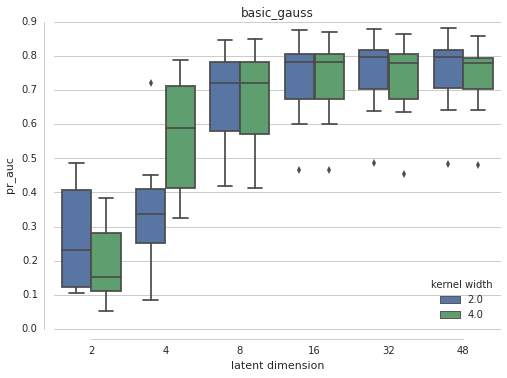

In [81]:
ax = sns.boxplot(x="D", 
                   y=metric, hue="gauss_sigma",
                  data=alldf, )
                     #jitter=True )

sns.despine(offset=10, trim=True)
ax.legend(loc="lower right", title='kernel width')
ax.set_title(expname)
ax.set_xlabel("latent dimension")


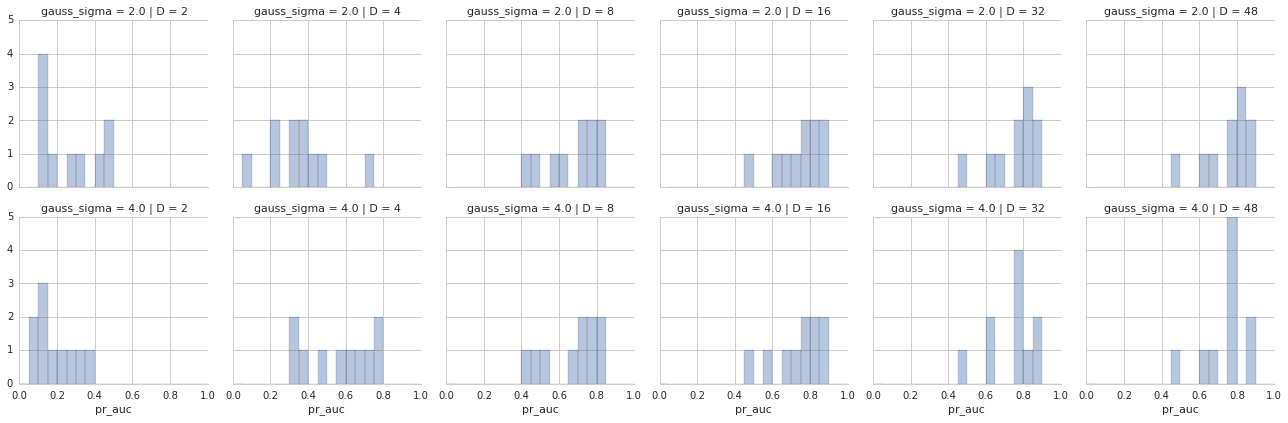

In [7]:
bins = np.linspace(0, 1, 21)
g = sns.FacetGrid(col = "D",
                  row = "gauss_sigma", data=alldf)
g.map(sns.distplot, metric, kde=False, bins=bins)

In [8]:
resdata = []
for ri, r in df.iterrows():
    ddf = pickle.load(open("../results/%s.%s.%04d.summary.pickle" % (expname, data, ri), 'r'))
    res = ddf['df']
    res['expid'] = ri
    res['x_est'] = ddf['xvals']
    resdata.append(res)
    
resdf = pd.concat(resdata).reset_index()

/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  if __name__ == '__main__':


/opt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


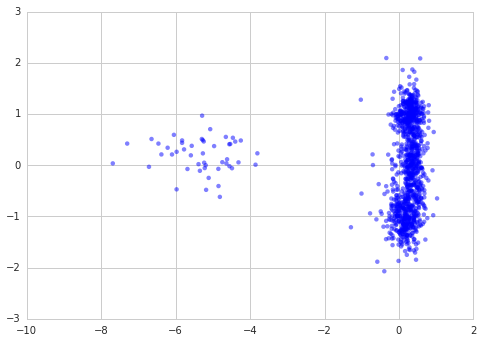

In [9]:
xe = resdf.sort('pr_auc', ascending=False).irow(0).x_est
vi = np.argsort(xe.var(axis=0))[::-1]
pylab.scatter(xe[:, vi[0]], xe[:, vi[1]], edgecolor='none', alpha=0.5)

/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: irow(i) is deprecated. Please use .iloc[i]


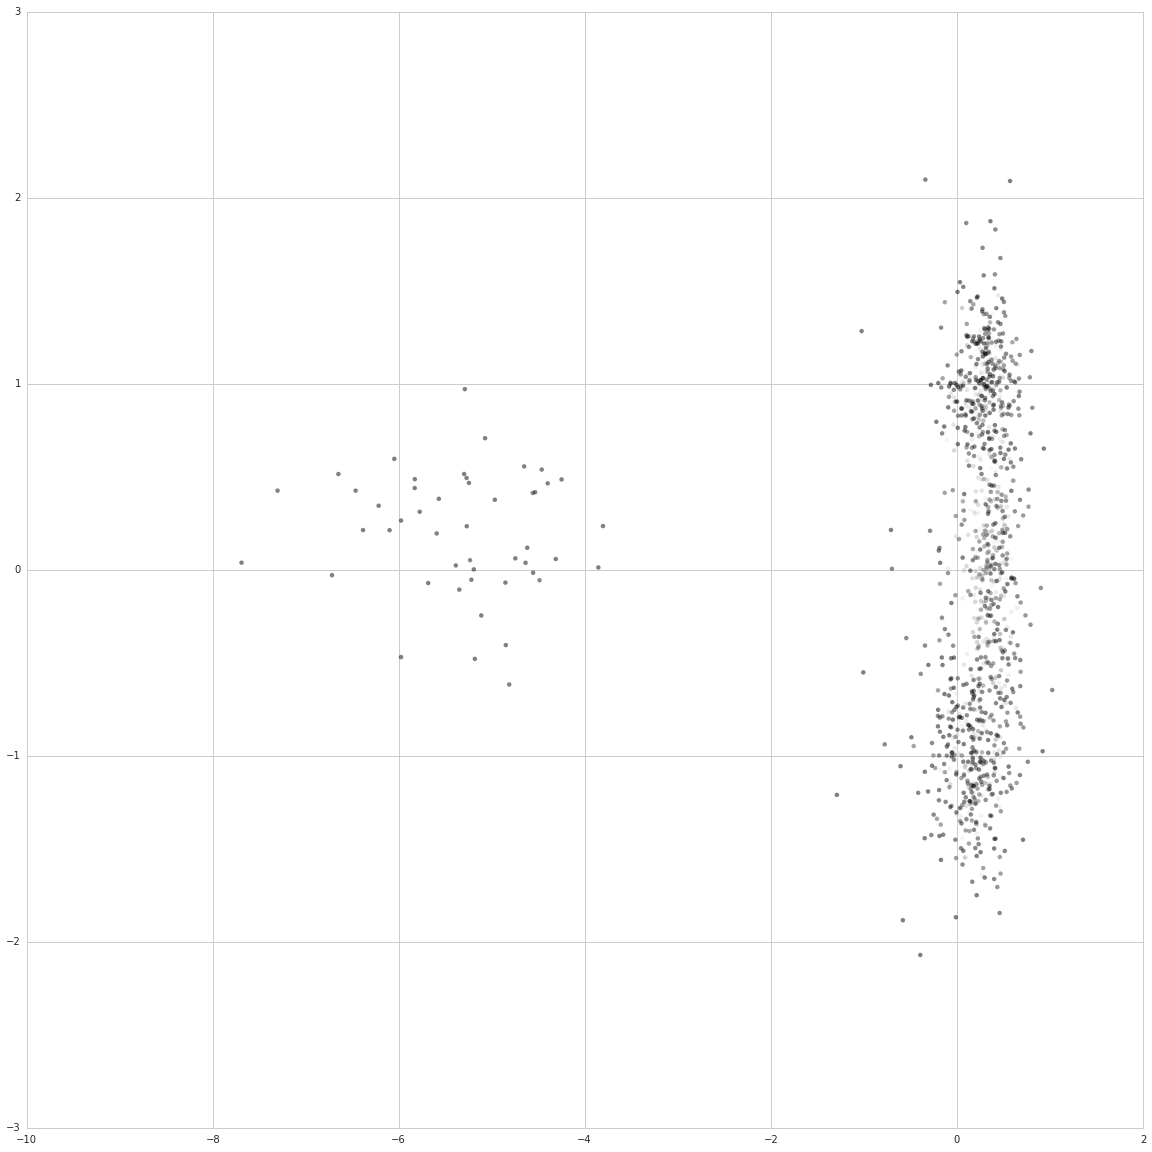

In [10]:
origdata = pickle.load(open('../data/retina.cleandata.pickle'))
neurondf = origdata['neurondf']



xe = resdf.sort('pr_auc', ascending=False).irow(0).x_est
vi = np.argsort(xe.var(axis=0))[::-1]
pylab.figure(figsize=(20, 20))
pylab.scatter(xe[:, vi[0]], xe[:, vi[1]], c=neurondf.type_id, 
              edgecolor='none', alpha=0.5)

In [11]:

import pandas
import sqlite3
import os

PAPER_MAX_CONTACT_AREA = 5.0 # microns, to eliminate touching somata

MOUSE_RETINA_DB='../neurodata.preprocess/mouseretina/mouseretina.db'


con = sqlite3.connect(MOUSE_RETINA_DB)
somapos_df = pandas.io.sql.read_sql("select * from somapositions order by cell_id", 
                                    con, index_col="cell_id")
cell_df = pandas.io.sql.read_sql("select * from cells order by cell_id", 
                                    con, index_col="cell_id")
type_df = pandas.io.sql.read_sql("select * from types order by type_id", 
                                    con, index_col="type_id")
alldf = cell_df.join(somapos_df)
alldf = alldf.join(type_df, on='type_id')
alldf.head()

type_id  id           x          y          z designation  \
cell_id                                                              
1              1   1  110.903386  76.634968  43.534109     gc10-40   
2              1   2  110.469775  51.420433  19.078139     gc10-40   
3              2   3  111.413632  31.639387  37.333484     gc14-30   
4              2   4  109.894836  71.834942  66.430094     gc14-30   
5              2   5  110.409435  74.962651   6.947813     gc14-30   

        volgyi_type macneil_type coarse certainty  
cell_id                                            
1               G11                  gc         M  
2               G11                  gc         M  
3                                    gc            
4                                    gc            
5                                    gc

In [12]:
alldf.coarse.value_counts()

bc       427
nac      181
mwac     172
gc        36
other     24
Name: coarse, dtype: int64

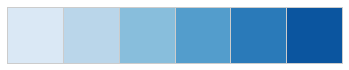

In [13]:
sns.palplot(sns.color_palette("Blues"))

/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  from ipykernel import kernelapp as app


<matplotlib.colorbar.Colorbar instance at 0x7f946a9b39e0>

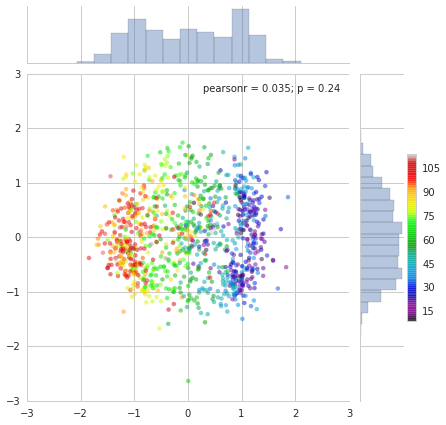

In [14]:

xe = resdf.sort('pr_auc', ascending=False).irow(0).x_est
vi = np.argsort(xe.var(axis=0))[::-1]
sns.jointplot(xe[:, vi[1]], xe[:, vi[2]], c=alldf.y, 
              edgecolor='none', alpha=0.5, cmap=pylab.cm.spectral)
pylab.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f944c2c9050>

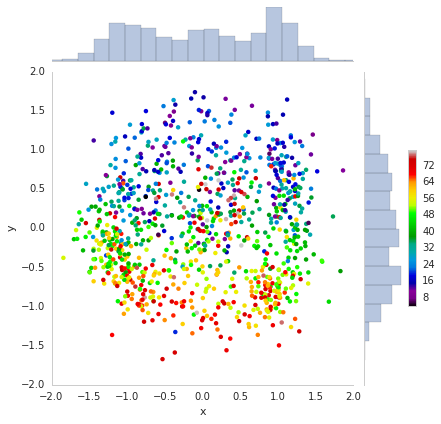

In [23]:

dimdf = pd.DataFrame({'x' : xe[:, vi[1]], 
                      'y' : xe[:, vi[2]],
                      'c' : alldf.z})

g = sns.JointGrid(x="x", y="y", data=dimdf, xlim=(-2, 2), ylim=(-2, 2))
g = g.plot_joint(pylab.scatter, c=dimdf.c, edgecolor='none', 
                 cmap=pylab.cm.spectral)
g = g.plot_marginals(sns.distplot, kde=False, bins=20)
g.ax_joint.grid(False)
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)
pylab.colorbar()
#sns.despine()

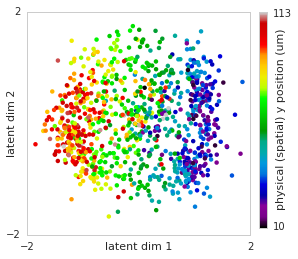

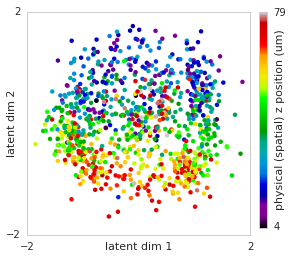

In [74]:

for posvar, cb_labelpad in [('y', -15), ('z', -10)]:
    fig = pylab.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 1, 1)
    ld_1 = vi[1]
    ld_2 = vi[2]
    sc = ax.scatter(xe[:, ld_1 ], xe[:, ld_2], 
                    c=alldf[posvar], edgecolor='none', cmap=pylab.cm.spectral)
    ax.set_xlim(-2, 2, )
    ax.set_ylim(-2, 2)
    ax.grid(False)
    ax.set_xticks([-2, 2])
    ax.set_yticks([-2, 2])
    ax.set_xlabel("latent dim %d" % 1, labelpad=-10)
    ax.set_ylabel("latent dim %d" % 2, labelpad=-10)

    cbaxes = fig.add_axes([0.93, 0.15, 0.03, 0.75]) 
    cb = pylab.colorbar(sc, cax = cbaxes) 
    mintick = int(np.min(alldf[posvar]))+1
    maxtick = int(np.max(alldf[posvar]))
    cb.set_ticks([mintick, maxtick])
    cb.set_label("physical (spatial) %s position (um)" % posvar, 
                 labelpad=cb_labelpad,
                    ha='center',)
    #fig.tight_layout()
    fig.savefig("mouse retina vis with celltypes.latentvar.spatial%s.pdf" % posvar, 
                pad_inches=0.2, bbox_inches='tight')
    #fig.colorbar(sc)


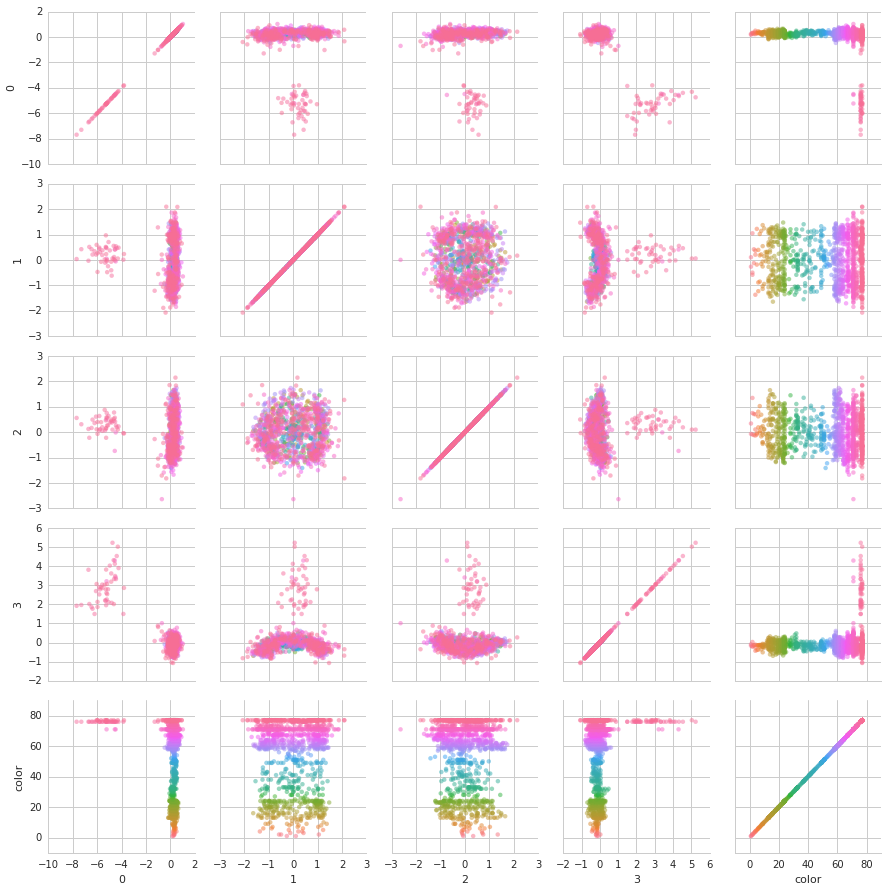

In [22]:
a = pd.DataFrame(xe[:, vi[0:4]])
a['color'] = np.array(alldf.type_id)
g = sns.PairGrid(a, hue="color")
g = g.map(plt.scatter, edgecolor='none', alpha=0.5)

In [234]:
colordict = {v:k for k, v in enumerate(alldf.coarse.value_counts().index.values)}
colordict[None] = 6
alldf.coarse_color = alldf.coarse.apply(lambda x : colordict[x])
alldf.is_gc = (alldf.coarse != 'nac') 

/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  app.launch_new_instance()


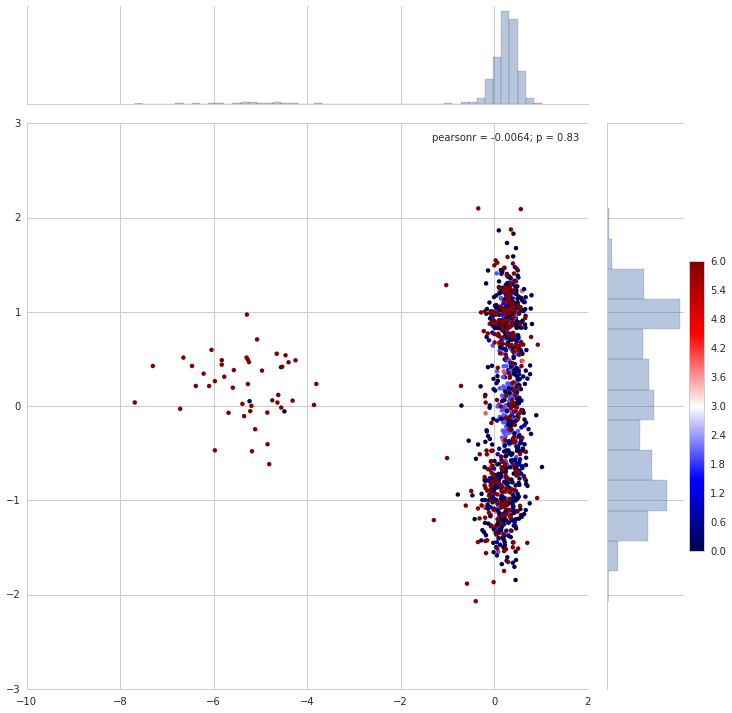

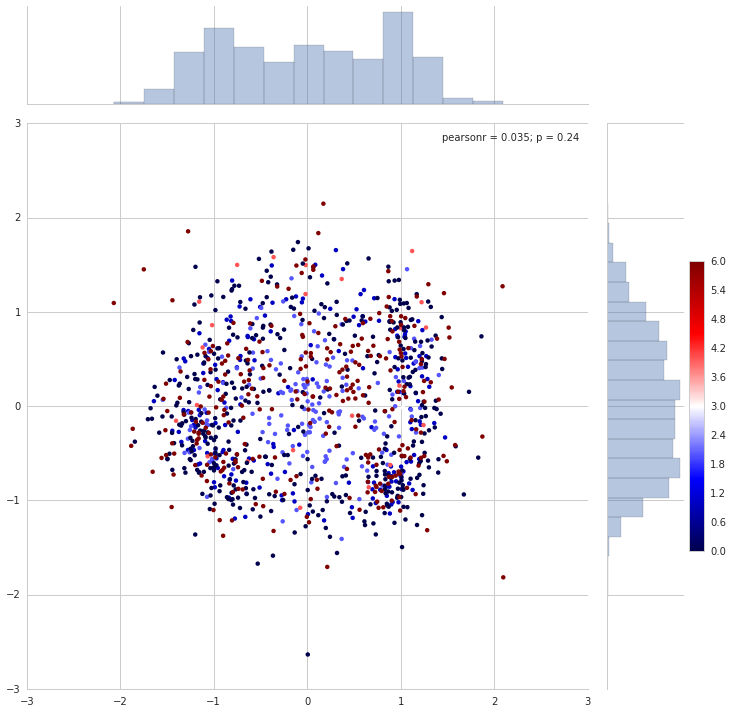

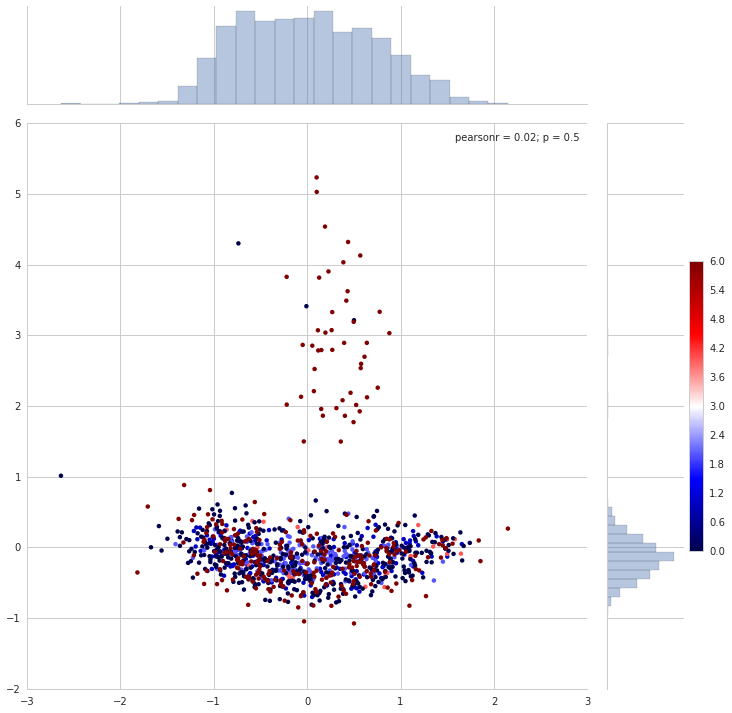

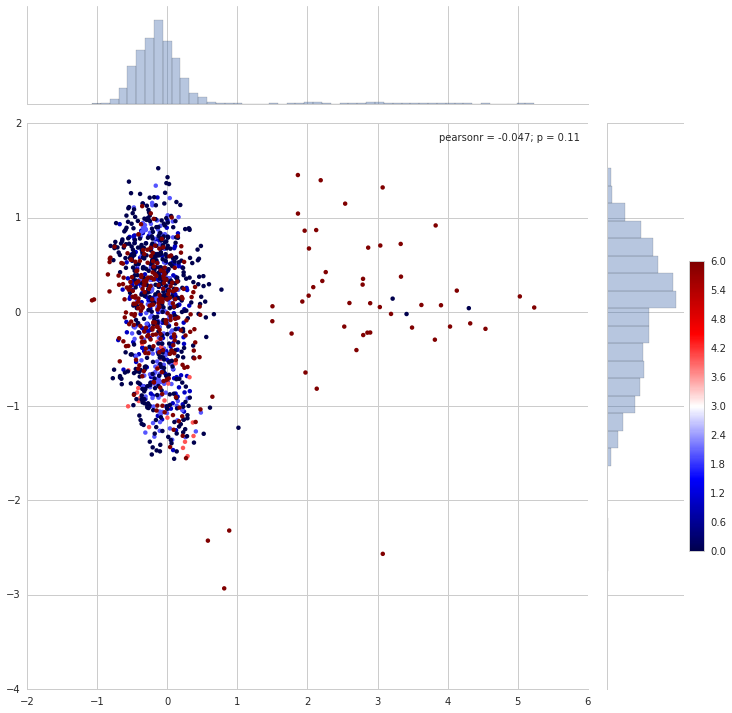

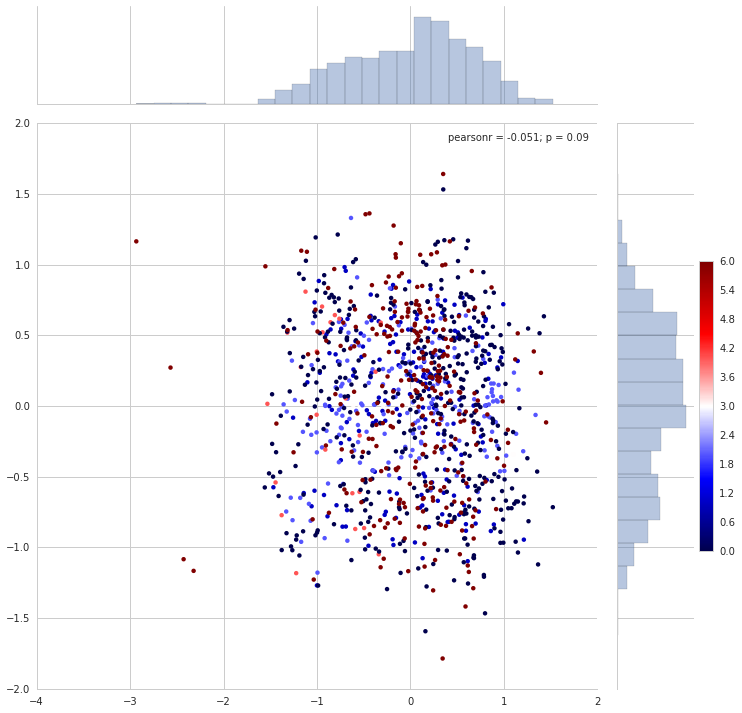

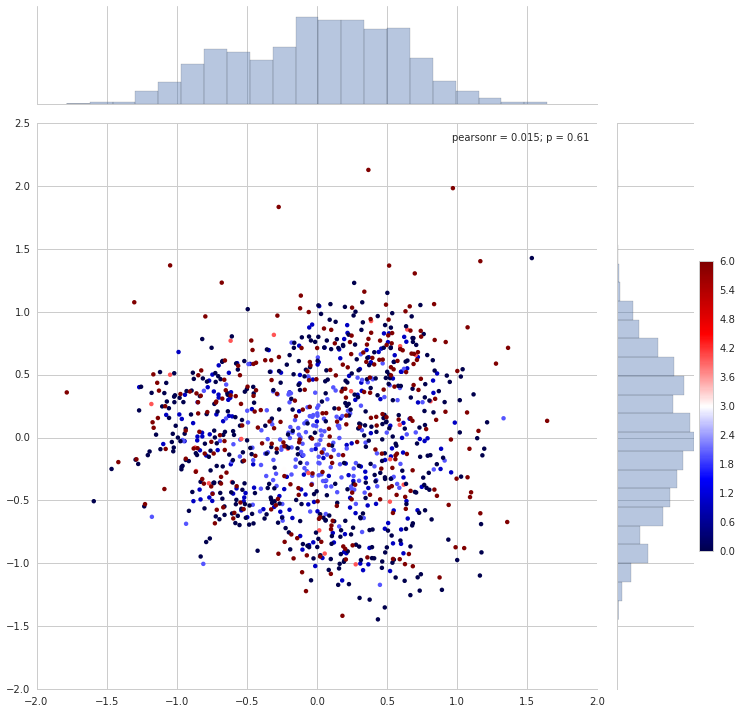

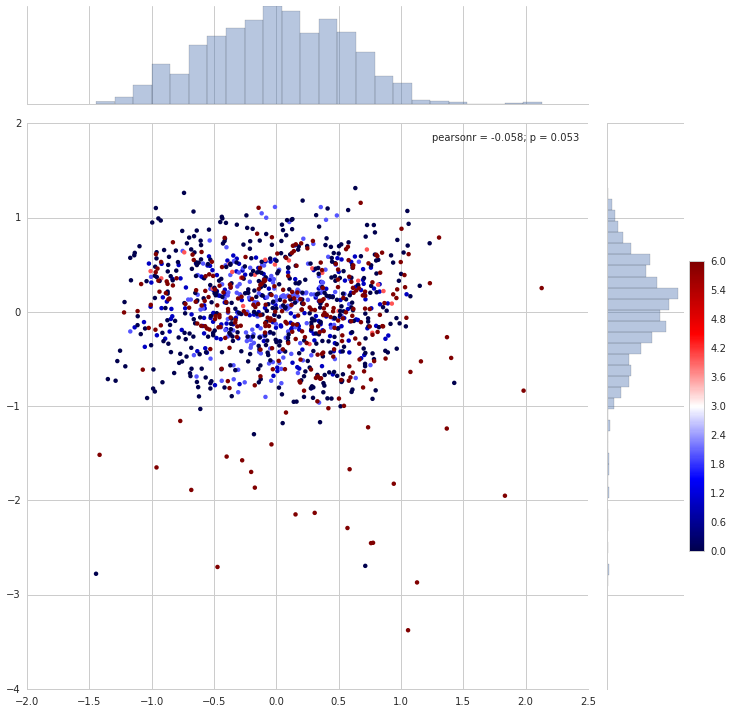

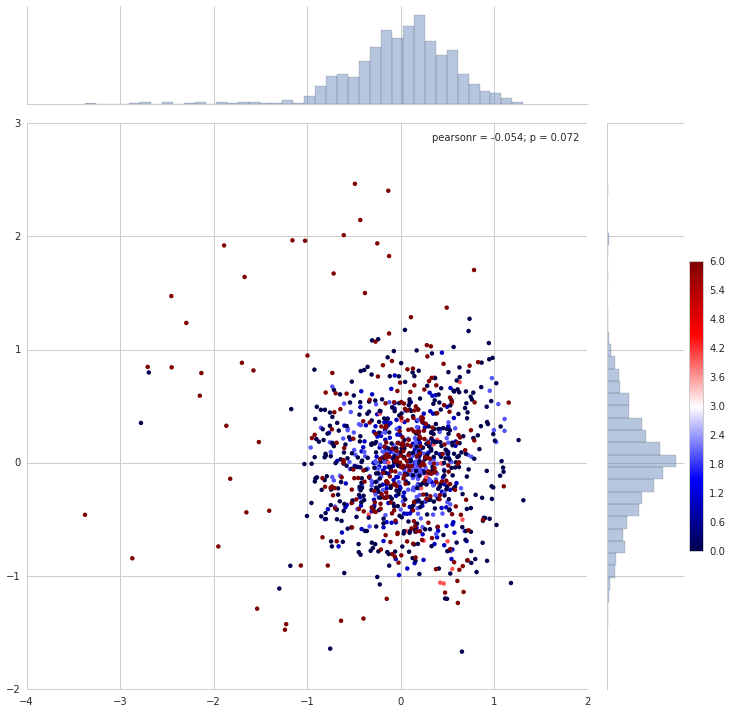

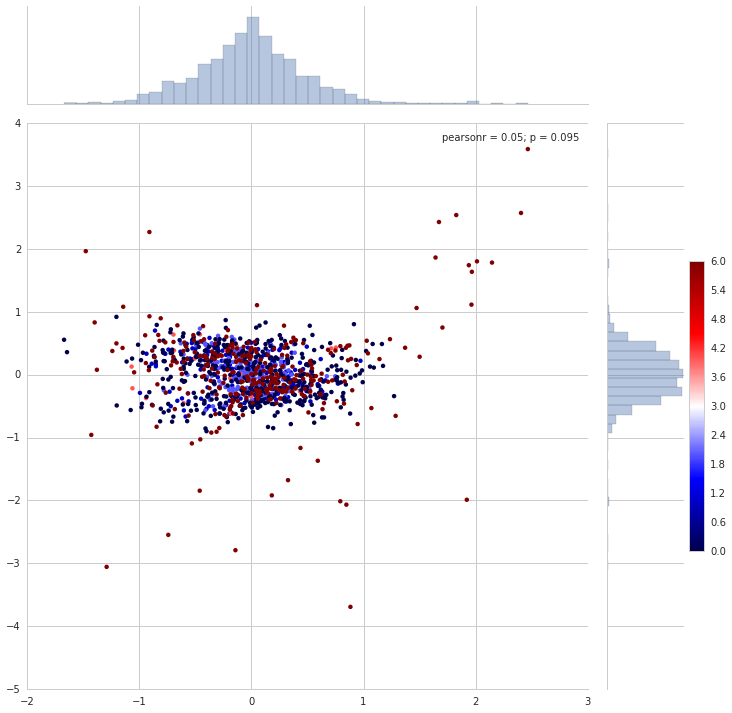

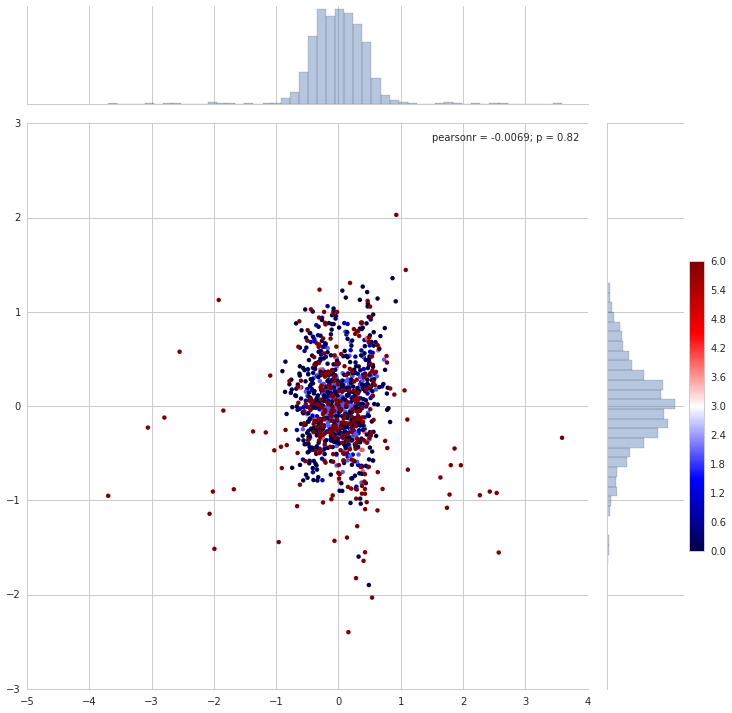

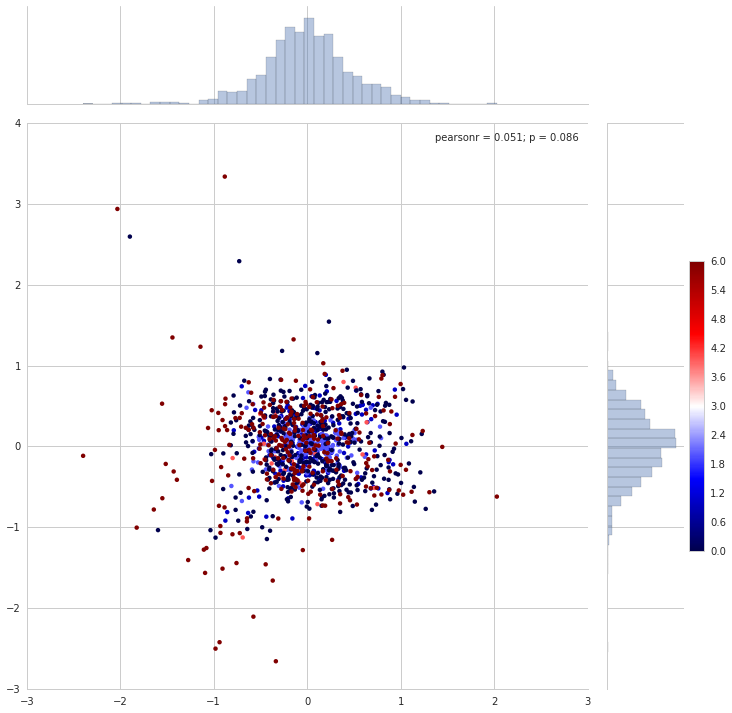

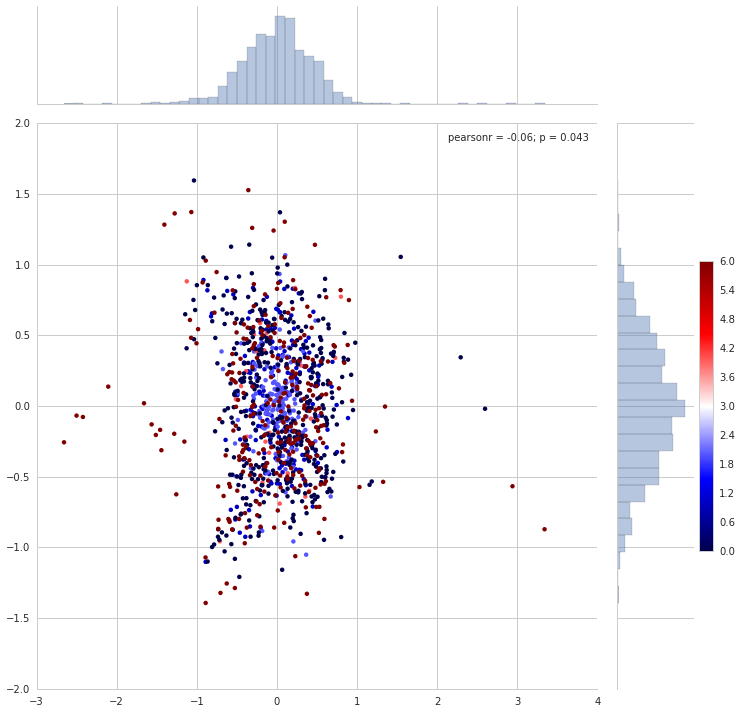

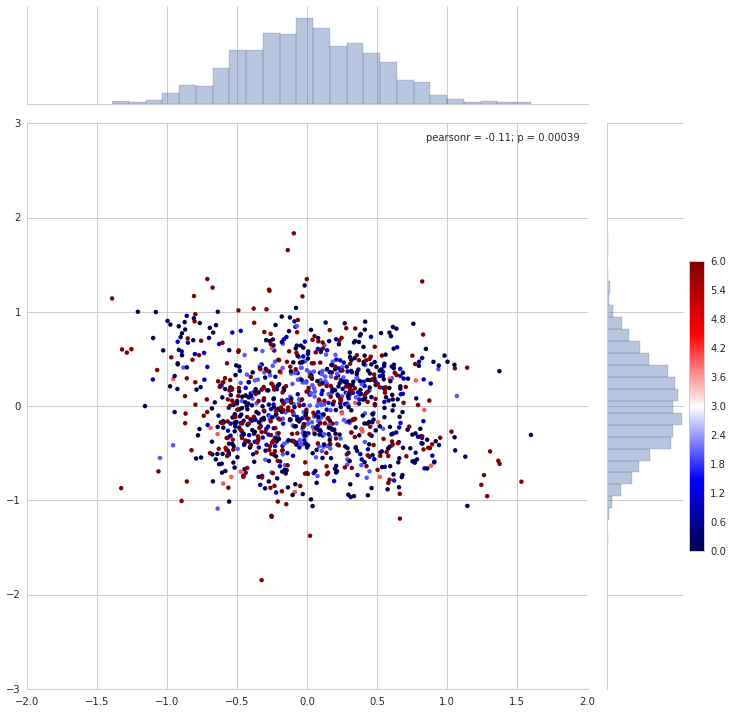

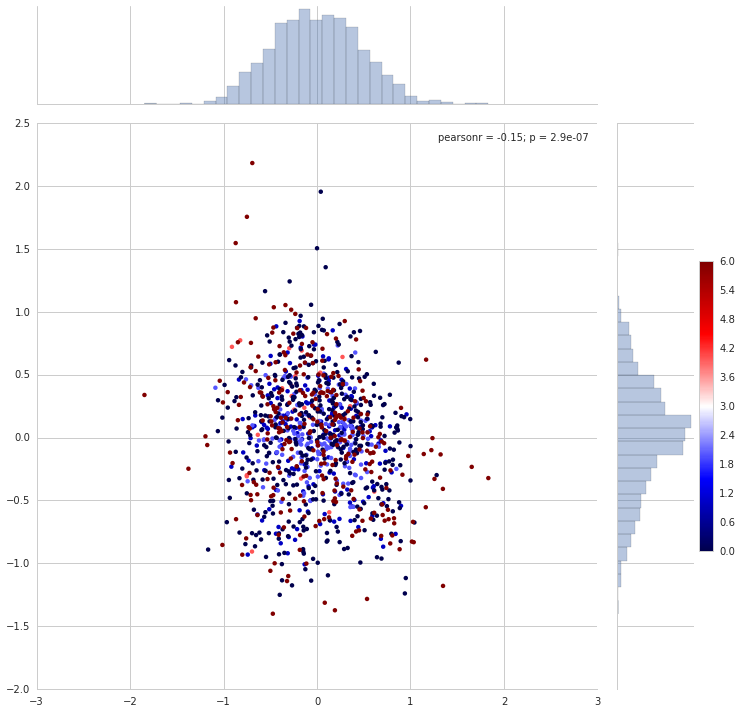

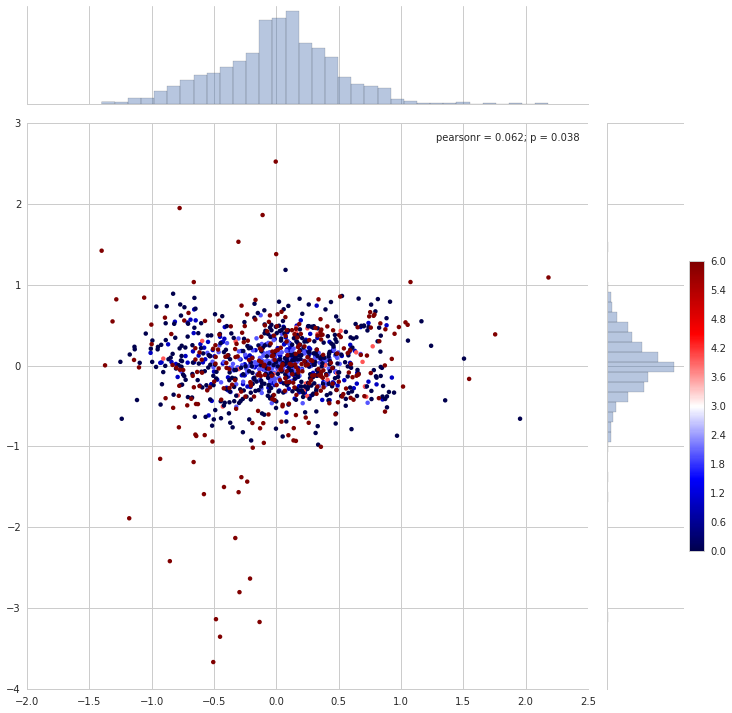

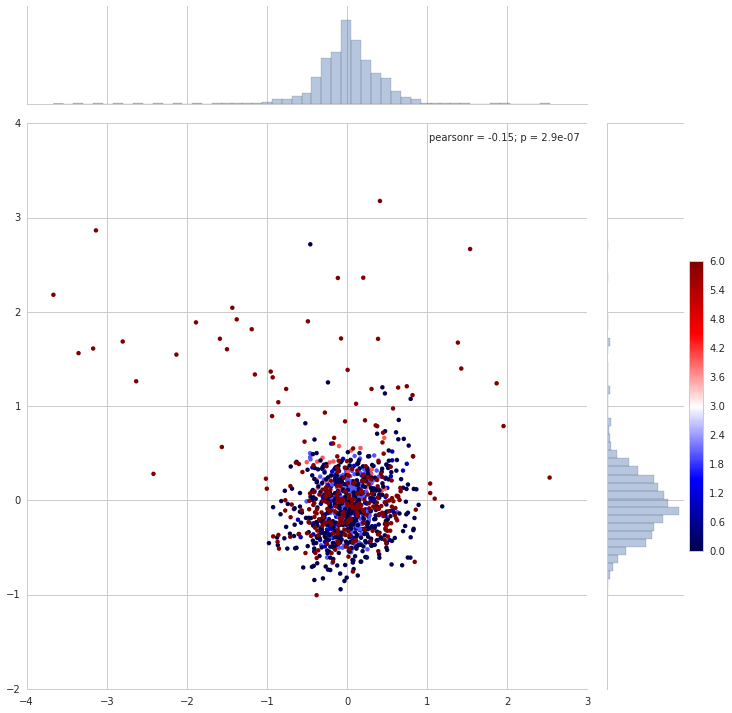

In [253]:
for i in range(16):
    pylab.figure()
    xe = resdf.sort('pr_auc', ascending=False).irow(0).x_est
    vi = np.argsort(xe.var(axis=0))[::-1]
    sns.jointplot(xe[:, vi[i]], xe[:, vi[i+1]], c=alldf.coarse_color, 
                  edgecolor='none', alpha=1, cmap=pylab.cm.seismic, size=10)
    pylab.colorbar()